<a href="https://colab.research.google.com/github/wouissiakou/IDF_code/blob/main/Copie_de_VGG16_KVASIR_SUMMER_SCHOOL_Trained_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMAGE CLASSIFICATION USING DEEP LEARNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()
# end_time = time.monotonic()
# print(timedelta(seconds=end_time - start_time))

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below
import tensorflow as tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D,Dropout
from keras.regularizers import l2
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import keras
import matplotlib.pyplot as plt

In [ ]:
!pip install split-folders

In [ ]:
# import splitfolders
# splitfolders.ratio('C:/Users/user1/Desktop/Summer School/dataset/kvasir-dataset-v2', output="C:/Users/user1/Desktop/Summer School/dataset/Dataset_E_P_U", seed=1337, ratio=(.5, 0.2,0.3))

In [ ]:
# method to visualise dataset distribution using bar plot
def visualise_dataset_distribution(directory_path, message):
  # Create a list of class labels for each image
  class_names = sorted(os.listdir(directory_path)) # Assuming class names are folder names
  labels = []
  for class_name in class_names:
      image_dir = os.path.join(directory_path, class_name)
      for image_name in os.listdir(image_dir):
          labels.append(class_name)

  # Count the number of occurrences of each class label
  unique, counts = np.unique(labels, return_counts=True)
  class_counts = dict(zip(unique, counts))

  print(message, "\n")

#   # Create a bar plot of the class distribution
#   plt.bar(class_counts.keys(), class_counts.values())
#   plt.xlabel('Data')
#   plt.ylabel('Number of images')
#   plt.show()

# method for visualising the images
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

    # method to check the shape of images
def get_image_shape(class_name, image_path):
  image = plt.imread(image_path)

  print("\n", class_name, " Image shape: ", image.shape, "\n")
  plt.imshow(image, cmap='gray')
  plt.show()

In [ ]:
import os
# Listing the directories in the dataset CT Kidney Dataset
os.listdir('/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/train')

['ulcerative-colitis', 'esophagitis', 'polyps']

In [ ]:
# defining the path for each training class

path_esophagitis = '/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/train/esophagitis'
path_polyps = '/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/train/polyps'
path_ulcerative_colitis = '/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/train/ulcerative-colitis'

esophagitis:



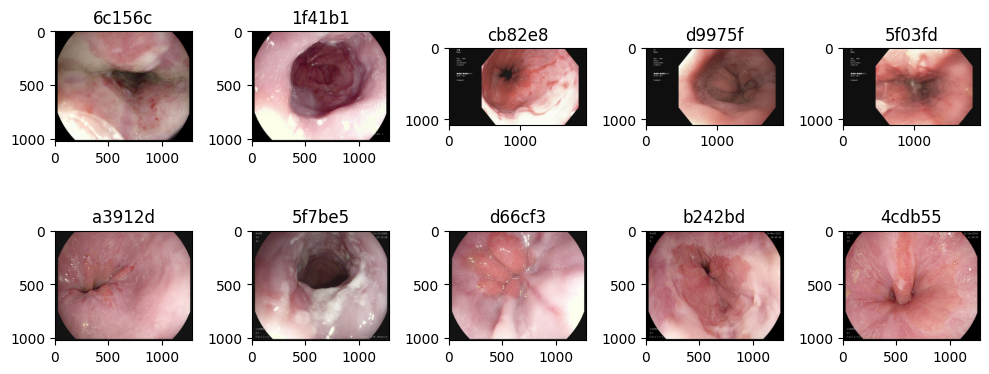

In [ ]:
# calling the plot_imgs method for visualising the images
print("esophagitis:\n")
plot_imgs(path_esophagitis, 10)

Polyps:



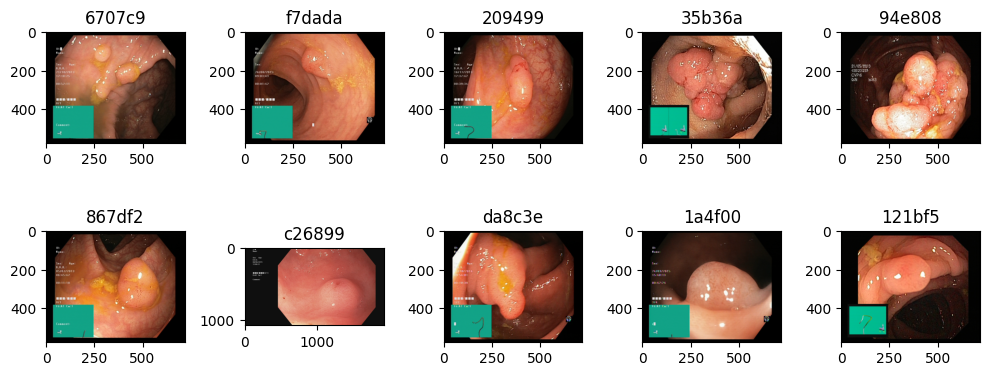

In [ ]:
print("Polyps:\n")
plot_imgs(path_polyps, 10)

ulcerative_colitis:



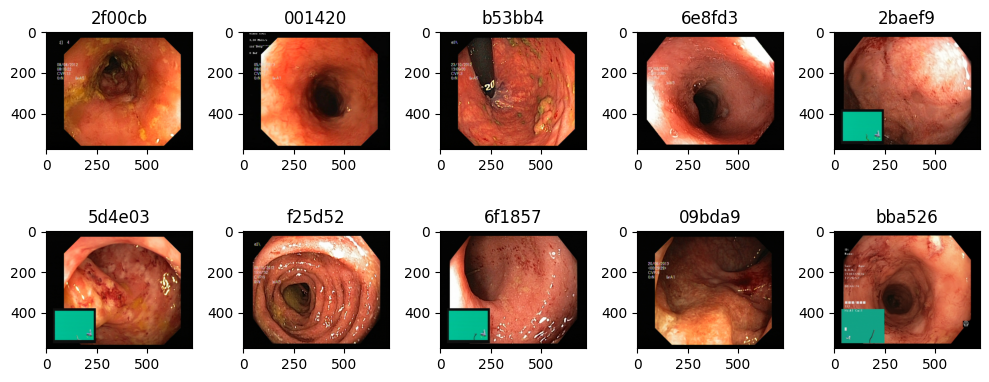

In [ ]:
print("ulcerative_colitis:\n")
plot_imgs(path_ulcerative_colitis, 10)

In [ ]:
# MEDICAL IMAGE CLASSIFICATION MODEL

In [ ]:
# Local Path to dataset[Train/Validation/test]
IMAGE_SIZE = [224, 224] # re-size all the images to this

train_path = '/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/train'
valid_path = '/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/val'
test_path='/content/drive/MyDrive/Dataset[Summer School Agadir]/Classification/Dataset_E_P_U/test'

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

train_datagen = ImageDataGenerator(rescale = 1./255
                                   ,rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True
                                    )

valid_datagen = ImageDataGenerator(rescale = 1./255
                                    ,rotation_range=30,
                                    width_shift_range=0.5,
                                    height_shift_range=0.1,
                                    horizontal_flip=False,
                                    vertical_flip=True
                                    )
test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(directory= train_path,
                                                target_size=(224, 224), # resize to this size
                                                color_mode="rgb", # for coloured images
                                                batch_size=32, # number of images to extract from folder for every batch
                                                class_mode="categorical", # classes to predict
                                                shuffle=True,
                                                seed=42)

valid_set = valid_datagen.flow_from_directory(directory= valid_path,
                                                target_size=(224, 224), # resize to this size
                                                color_mode="rgb", # for coloured images
                                                batch_size=32, # number of images to extract from folder for every batch
                                                class_mode="categorical", # classes to predict
                                                shuffle=True,
                                                seed=42)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=1,
                                            class_mode='categorical',
                                            )

Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [ ]:
# Import the VGG16 library as shown below.
from tensorflow.keras.applications.vgg16 import VGG16

# Here we will be using imagenet weights
VGG = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# freeze the base model layers so that they’re not updated during the training process.
for layer in VGG.layers:
    layer.trainable = False #set to False to freeze

# our layers - you can add more if you want
x =  Flatten()(VGG.output)
prediction = Dense(3, activation='softmax')(x) #final classification layer. (Set the number of class and activation function)

# create a model object
model_1 = Model(inputs=VGG.input, outputs=prediction)

# view the structure of the model
model_1.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
 # # tell the model what cost and optimization method to use
model_1.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
            )

# fit the model
# Run the cell. It will take some time to execute
model_1.fit = model_1.fit(
  training_set,
  validation_data=valid_set,
  epochs=10)

Epoch 1/10
47/47 [==============================] - 329s 7s/step - loss: 0.7104 - accuracy: 0.7180 - val_loss: 0.5372 - val_accuracy: 0.7650
Epoch 2/10
47/47 [==============================] - 74s 2s/step - loss: 0.3368 - accuracy: 0.8667 - val_loss: 0.4387 - val_accuracy: 0.8083
Epoch 3/10
47/47 [==============================] - 74s 2s/step - loss: 0.3090 - accuracy: 0.8853 - val_loss: 0.4454 - val_accuracy: 0.7967
Epoch 4/10
47/47 [==============================] - 95s 2s/step - loss: 0.2976 - accuracy: 0.8880 - val_loss: 0.4400 - val_accuracy: 0.8117
Epoch 5/10
47/47 [==============================] - 74s 2s/step - loss: 0.2480 - accuracy: 0.9047 - val_loss: 0.5350 - val_accuracy: 0.7700
Epoch 6/10
47/47 [==============================] - 76s 2s/step - loss: 0.2478 - accuracy: 0.8940 - val_loss: 0.4330 - val_accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 75s 2s/step - loss: 0.2439 - accuracy: 0.9100 - val_loss: 0.4201 - val_accuracy: 0.8300
Epoch 8/10
47/47 [=

47/47 [==============================] - 54s 1s/step - loss: 0.1956 - accuracy: 0.9253
Train loss & accuracy: [0.19556142389774323, 0.9253333210945129]


19/19 [==============================] - 21s 1s/step - loss: 0.3874 - accuracy: 0.8417
Validation loss & accuracy [0.3874369263648987, 0.8416666388511658]


900/900 [==============================] - 367s 408ms/step - loss: 0.1886 - accuracy: 0.9211
Test loss & accuracy [0.1886170655488968, 0.9211111068725586]


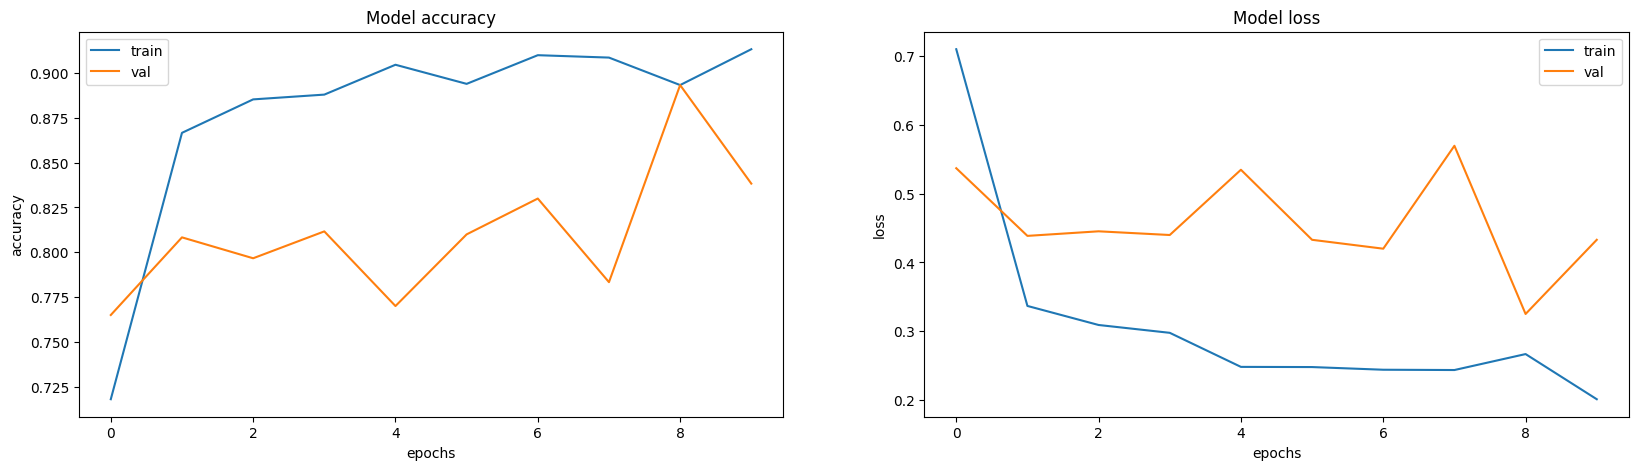

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(model_1.fit.history[met])
    ax[i].plot(model_1.fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

print('Train loss & accuracy:', model_1.evaluate(training_set))
print('\n')
print('Validation loss & accuracy', model_1.evaluate(valid_set))
print('\n')
print('Test loss & accuracy', model_1.evaluate(test_set))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=900,
                                            class_mode='categorical',
                                            )
(X_test, y_test)= next(test_set)
y_test_preds = model_1.predict(X_test)
y_test_preds = np.argmax(y_test_preds, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

class_names = ['0_normal', '1_ulcerative_colitis', '2_polyps'] #List of Classes used
print("Test Accuracy : {}".format(accuracy_score(y_test_arg , y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test_arg , y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test_arg , y_test_preds, target_names=class_names))

Found 900 images belonging to 3 classes.
29/29 [==============================] - 4s 151ms/step
Test Accuracy : 0.9211111111111111

Confusion Matrix : 
[[297   2   1]
 [  4 280  16]
 [  2  46 252]]

Classification Report :
                      precision    recall  f1-score   support

            0_normal       0.98      0.99      0.99       300
1_ulcerative_colitis       0.85      0.93      0.89       300
            2_polyps       0.94      0.84      0.89       300

            accuracy                           0.92       900
           macro avg       0.92      0.92      0.92       900
        weighted avg       0.92      0.92      0.92       900



In [ ]:
# model_1.save('C:/Users/user1/Desktop/Summer School/Classification model/VGG16(model_1(1)).h5')

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D,Dropout
from keras.regularizers import l2
# Here we will be using imagenet weights

VGG = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
# for layer in VGG.layers:
#     layer.trainable = False

VGG.trainable = False

# our layers - you can add more if you want
# Add your own layers
x = GlobalAveragePooling2D()(VGG.output)
x = Dropout(0.5)(x)  # Apply dropout with a rate of 0.5
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Apply L2 regularization
x = Dropout(0.3)(x)  # Apply dropout with a rate of 0.3
prediction = Dense(3, activation='softmax')(x)

# create a model object
model_2 = Model(inputs=VGG.input, outputs=prediction)

# view the structure of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
 # # tell the model what cost and optimization method to use
model_2.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
            )

# fit the model
# Run the cell. It will take some time to execute
model_2.fit = model_2.fit(
  training_set,
  validation_data=valid_set,
  epochs=10)

Epoch 1/10
47/47 [==============================] - 87s 2s/step - loss: 2.4205 - accuracy: 0.4300 - val_loss: 1.7176 - val_accuracy: 0.6033
Epoch 2/10
47/47 [==============================] - 79s 2s/step - loss: 1.4939 - accuracy: 0.5540 - val_loss: 1.2038 - val_accuracy: 0.7500
Epoch 3/10
47/47 [==============================] - 79s 2s/step - loss: 1.1806 - accuracy: 0.6227 - val_loss: 0.9866 - val_accuracy: 0.8300
Epoch 4/10
47/47 [==============================] - 78s 2s/step - loss: 1.0292 - accuracy: 0.6573 - val_loss: 0.8992 - val_accuracy: 0.7917
Epoch 5/10
47/47 [==============================] - 77s 2s/step - loss: 0.9683 - accuracy: 0.6740 - val_loss: 0.8410 - val_accuracy: 0.7983
Epoch 6/10
47/47 [==============================] - 79s 2s/step - loss: 0.9259 - accuracy: 0.6827 - val_loss: 0.7851 - val_accuracy: 0.8083
Epoch 7/10
47/47 [==============================] - 77s 2s/step - loss: 0.8753 - accuracy: 0.7107 - val_loss: 0.8258 - val_accuracy: 0.7200
Epoch 8/10
47/47 [==

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=1,
                                            class_mode='categorical',
                                            )

Found 900 images belonging to 3 classes.


47/47 [==============================] - 64s 1s/step - loss: 0.6363 - accuracy: 0.8540
Train loss & accuracy: [0.6362701654434204, 0.8539999723434448]


19/19 [==============================] - 21s 1s/step - loss: 0.6794 - accuracy: 0.8383
Validation loss & accuracy [0.6794434189796448, 0.8383333086967468]


900/900 [==============================] - 28s 31ms/step - loss: 0.6148 - accuracy: 0.8778
Test loss & accuracy [0.614761233329773, 0.8777777552604675]


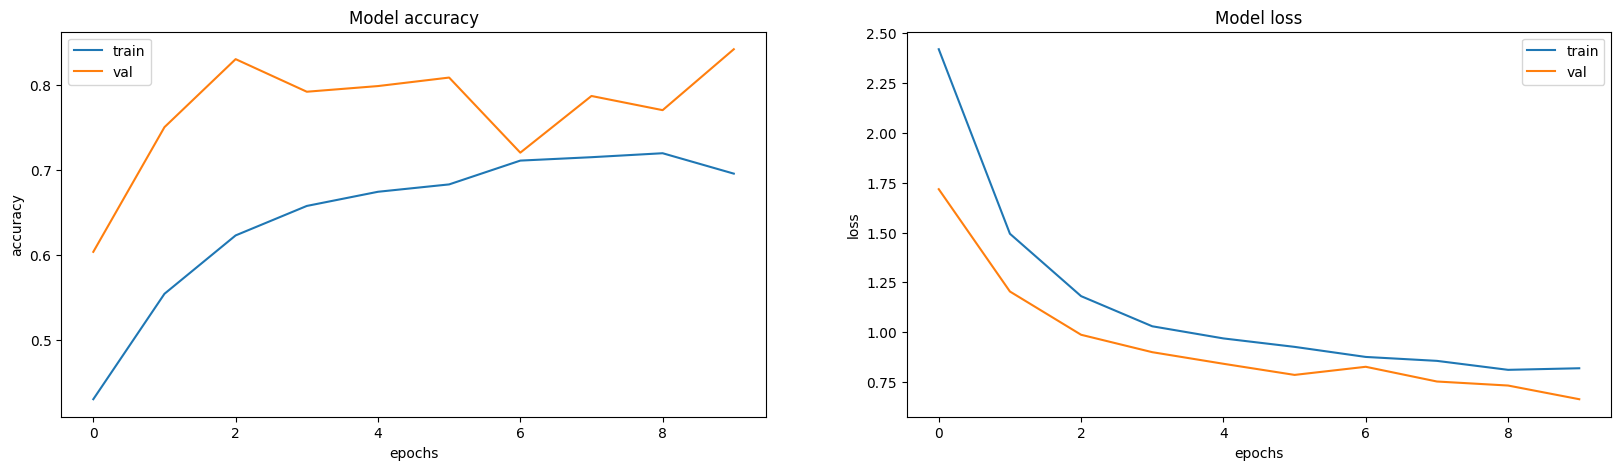

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(model_2.fit.history[met])
    ax[i].plot(model_2.fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

print('Train loss & accuracy:', model_2.evaluate(training_set))
print('\n')
print('Validation loss & accuracy', model_2.evaluate(valid_set))
print('\n')
print('Test loss & accuracy', model_2.evaluate(test_set))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=900,
                                            class_mode='categorical',
                                            )
(X_test, y_test)= next(test_set)
y_test_preds = model_2.predict(X_test)
y_test_preds = np.argmax(y_test_preds, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

class_names = ['0_normal', '1_ulcerative_colitis', '2_polyps'] #List of Classes used
print("Test Accuracy : {}".format(accuracy_score(y_test_arg , y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test_arg , y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test_arg , y_test_preds, target_names=class_names))

Found 900 images belonging to 3 classes.
29/29 [==============================] - 3s 119ms/step
Test Accuracy : 0.8777777777777778

Confusion Matrix : 
[[295   2   3]
 [ 10 225  65]
 [  9  21 270]]

Classification Report :
                      precision    recall  f1-score   support

            0_normal       0.94      0.98      0.96       300
1_ulcerative_colitis       0.91      0.75      0.82       300
            2_polyps       0.80      0.90      0.85       300

            accuracy                           0.88       900
           macro avg       0.88      0.88      0.88       900
        weighted avg       0.88      0.88      0.88       900



In [ ]:
# model_2.save('C:/Users/user1/Desktop/Summer School/Classification model/VGG16(model_2(2)).h5')

In [ ]:
# FINETUNING

In [ ]:

VGG = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(VGG.layers))


Number of layers in the base model:  19


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 1

# Freeze all the layers before the `fine_tune_at` layer
for layer in VGG.layers[:fine_tune_at]:
  layer.trainable = False

# our layers - you can add more if you want
# Add your own layers
# x = GlobalAveragePooling2D()(VGG.output)
# x = Dropout(0.5)(x)  # Apply dropout with a rate of 0.5
# x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Apply L2 regularization
# x = Dropout(0.3)(x)  # Apply dropout with a rate of 0.3
x =  Flatten()(VGG.output)
prediction = Dense(3, activation='softmax')(x)

# create a model object
model_3 = Model(inputs=VGG.input, outputs=prediction)

# view the structure of the model
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
 # # tell the model what cost and optimization method to use
model_3.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
            )

# fit the model
# Run the cell. It will take some time to execute
model_3.fit = model_3.fit(
  training_set,
  validation_data=valid_set,
  epochs=10)

Epoch 1/10
47/47 [==============================] - 100s 2s/step - loss: 1.3063 - accuracy: 0.3353 - val_loss: 1.1132 - val_accuracy: 0.3333
Epoch 2/10
47/47 [==============================] - 79s 2s/step - loss: 1.1090 - accuracy: 0.3380 - val_loss: 1.0874 - val_accuracy: 0.3517
Epoch 3/10
47/47 [==============================] - 80s 2s/step - loss: 1.1017 - accuracy: 0.3500 - val_loss: 1.0930 - val_accuracy: 0.3300
Epoch 4/10
47/47 [==============================] - 99s 2s/step - loss: 1.0486 - accuracy: 0.4287 - val_loss: 0.9198 - val_accuracy: 0.5167
Epoch 5/10
47/47 [==============================] - 80s 2s/step - loss: 0.6499 - accuracy: 0.6560 - val_loss: 0.5530 - val_accuracy: 0.6850
Epoch 6/10
47/47 [==============================] - 79s 2s/step - loss: 0.5254 - accuracy: 0.7113 - val_loss: 0.4877 - val_accuracy: 0.7483
Epoch 7/10
47/47 [==============================] - 99s 2s/step - loss: 0.5123 - accuracy: 0.7333 - val_loss: 0.5274 - val_accuracy: 0.7000
Epoch 8/10
47/47 [=

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=1,
                                            class_mode='categorical',
                                            )

Found 900 images belonging to 3 classes.


47/47 [==============================] - 54s 1s/step - loss: 0.4721 - accuracy: 0.7420
Train loss & accuracy: [0.47213834524154663, 0.7419999837875366]


19/19 [==============================] - 22s 1s/step - loss: 0.4822 - accuracy: 0.7150
Validation loss & accuracy [0.48222529888153076, 0.7149999737739563]


900/900 [==============================] - 26s 29ms/step - loss: 0.5415 - accuracy: 0.7189
Test loss & accuracy [0.5414830446243286, 0.7188888788223267]


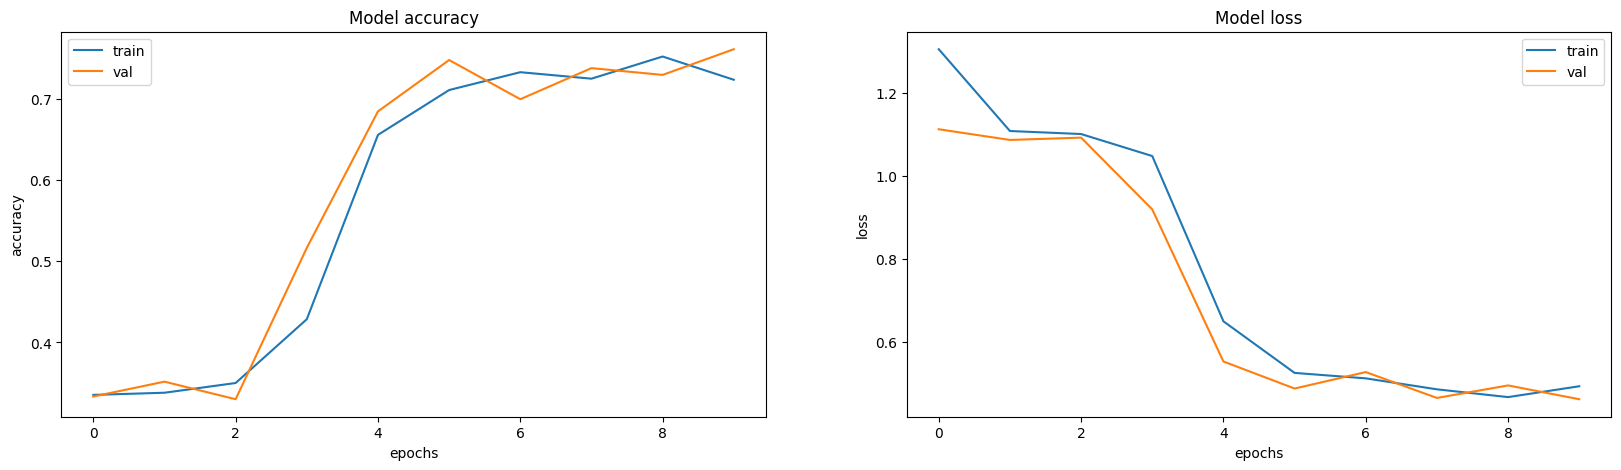

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(model_3.fit.history[met])
    ax[i].plot(model_3.fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

print('Train loss & accuracy:', model_3.evaluate(training_set))
print('\n')
print('Validation loss & accuracy', model_3.evaluate(valid_set))
print('\n')
print('Test loss & accuracy', model_3.evaluate(test_set))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=900,
                                            class_mode='categorical',
                                            )
(X_test, y_test)= next(test_set)
y_test_preds = model_3.predict(X_test)
y_test_preds = np.argmax(y_test_preds, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

class_names = ['0_normal', '1_ulcerative_colitis', '2_polyps']
print("Test Accuracy : {}".format(accuracy_score(y_test_arg , y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test_arg , y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test_arg , y_test_preds, target_names=class_names))

Found 900 images belonging to 3 classes.
29/29 [==============================] - 3s 115ms/step
Test Accuracy : 0.7188888888888889

Confusion Matrix : 
[[295   5   0]
 [  3  68 229]
 [  0  16 284]]

Classification Report :
                      precision    recall  f1-score   support

            0_normal       0.99      0.98      0.99       300
1_ulcerative_colitis       0.76      0.23      0.35       300
            2_polyps       0.55      0.95      0.70       300

            accuracy                           0.72       900
           macro avg       0.77      0.72      0.68       900
        weighted avg       0.77      0.72      0.68       900



In [ ]:
# model_3.save('C:/Users/user1/Desktop/Summer School/Classification model/VGG16(model_3(3)).h5')

In [ ]:
import time
from datetime import timedelta
# start_time = time.monotonic()
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

2:58:08.995147
